## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Tue Jun 16 12:18:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 442.23       Driver Version: 442.23       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX250      WDDM  | 00000000:3C:00.0 Off |                  N/A |
| N/A   60C    P0    N/A /  N/A |     64MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2 * (x - x.min()) / (x.max() - x.min()) - 1
    if flatten:
        x = x.reshape(len(x),-1)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
#         if i % 2:
#             x = keras.layers.Dropout(0.1)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 512, 256, 256, 128, 128, 128])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               1651

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 106us/step - loss: 2.2390 - accuracy: 0.1511 - val_loss: 2.2246 - val_accuracy: 0.1677
Epoch 2/100
50000/50000 [==============================] - 5s 96us/step - loss: 2.1341 - accuracy: 0.2106 - val_loss: 2.1174 - val_accuracy: 0.2144
Epoch 3/100
50000/50000 [==============================] - 5s 94us/step - loss: 2.0734 - accuracy: 0.2398 - val_loss: 2.0580 - val_accuracy: 0.2443
Epoch 4/100
50000/50000 [==============================] - 5s 99us/step - loss: 2.0215 - accuracy: 0.2624 - val_loss: 2.0339 - val_accuracy: 0.2612
Epoch 5/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.9886 - accuracy: 0.2757 - val_loss: 2.0224 - val_accuracy: 0.2646
Epoch 6/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.9548 - accuracy: 0.2927 - val_loss: 2.0139 - val_accuracy: 0.2664
Epoch 7/100
50000/50000 [==============================] -

50000/50000 [==============================] - 6s 128us/step - loss: 0.4441 - accuracy: 0.8434 - val_loss: 4.7060 - val_accuracy: 0.2793
Epoch 56/100
50000/50000 [==============================] - 6s 130us/step - loss: 0.4316 - accuracy: 0.8487 - val_loss: 4.5367 - val_accuracy: 0.2785
Epoch 57/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.4320 - accuracy: 0.8491 - val_loss: 4.5379 - val_accuracy: 0.2755
Epoch 58/100
50000/50000 [==============================] - 7s 135us/step - loss: 0.4026 - accuracy: 0.8589 - val_loss: 4.8800 - val_accuracy: 0.2807
Epoch 59/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.4317 - accuracy: 0.8494 - val_loss: 4.6642 - val_accuracy: 0.2841
Epoch 60/100
50000/50000 [==============================] - 7s 139us/step - loss: 0.3793 - accuracy: 0.8684 - val_loss: 5.1651 - val_accuracy: 0.2819
Epoch 61/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.3672 - accuracy: 0.8716 - val

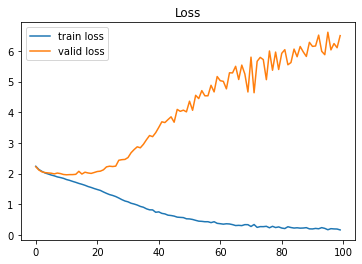

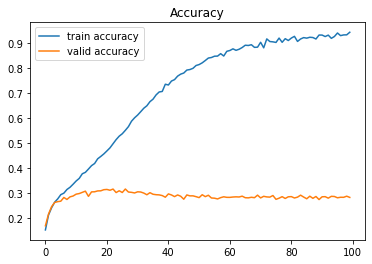

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()